In [3]:
import os
os.chdir('..')

In [6]:
from deterministic.homogeneous import solve_homogeneous_system, compute_diagram, compute_2D_diagram, compute_2D_botnet, compute_botnet_threshold
from deterministic.plots import plot_evolution, plot_diagram, plot_2D_diagram, plot_3D_protected, plot_2D_botnet, plot_botnet_threshold, plot_2D_botnet_time

import numpy as np
import pathlib
import pickle
import pandas as pd

# Analysis of a ER graph

We generate a random graph with average degree $\langle k \rangle$ and re-scale $\beta$ so that $\beta' = \beta/ \langle k \rangle$. Then, we look at the fraction of proected nodes as a function of $\beta$ and $\epsilon$. This should reproduce the phase diagram of the white worm, that is, if it can spread it will do so and cover almost the whole graph, but if it can't then no nodes will be protected. The results show a very similar picture as in the complete graph, even following the expression of the fraction of recovered people in a SEIR model when we are above the critical threshold. As expected, around the transition there are some differences between the analytical expression and the network.

In [3]:
import pathlib
import pickle

results = np.empty((0, 3))
for file_path in pathlib.Path('results').glob('protected_ER_N10000_*'):

    bW = float(file_path.stem.split('_bW')[1].split('_')[0])
    e = float(file_path.stem.split('_e')[1].split('_')[0])

    with open(file_path, 'rb') as file:
        data_list = pickle.load(file)

    protected = [x for x in data_list if x > 0.01]
    protected = np.median(protected) if len(protected) else 0

    results = np.vstack((results,
                         np.array([bW, e, protected])))

results = results[results[:, 1].argsort()]
results = results[results[:, 0].argsort(kind='mergesort')]

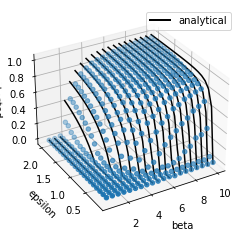

In [4]:
plot_3D_protected(results)

Now we look at the $\beta$ plane to see when the black worm is able to completely surpass the white one. In this case the results match perfectly the ones of the complete graph. The cause is that in the linear approximation the threshold to spread should depend, in the case of a random network, on $\langle k \rangle$ but since we are rescaling $\beta$ by that value, the expression is the same one.

In [5]:
import pathlib
import pickle

results = np.empty((0, 3))
for file_path in pathlib.Path('results').glob('botnet_ER_N10000_*'):

    bB = float(file_path.stem.split('_bB')[1].split('_')[0])
    bW = float(file_path.stem.split('_bW')[1].split('_')[0])

    with open(file_path, 'rb') as file:
        data_list = pickle.load(file)

    botnet = [botnet for botnet, protected in data_list if protected > 0.01]
    botnet = np.mean(botnet) if len(botnet) else 1

    results = np.vstack((results,
                         np.array([bB, bW, botnet])))

results = results[results[:, 1].argsort()]
results = results[results[:, 0].argsort(kind='mergesort')]

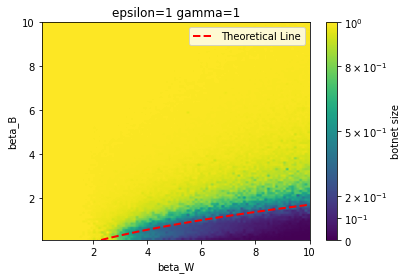

In [6]:
plot_2D_botnet(results)

Next we study the time the black worm is above a critical size for some fixed values of $\beta$ in the region where there is some interest (where the white worm can actually do something). We observe that this time the theoretical expression does not match the results, but note that the expression just gives us the expected size of the white worm, it does not say anything about time. **It could be that it simply takes longer for the black worm to spread, even if there was not a white worm at all.**

In [7]:
import pathlib
import pickle

bB = 1.0
bW = 2.0
gamma = 1.0

results = np.empty((0, 4))
for file_path in pathlib.Path('results').glob(f'botnet_threshold_ER_N10000_*_bB{bB}_bW{bW}*_g{gamma}*'):

    th = float(file_path.stem.split('k10_th')[1].split('_')[0])
    eps = float(file_path.stem.split('_e')[1].split('_')[0])

    with open(file_path, 'rb') as file:
        data_list = pickle.load(file)

    time = [time for protected, time, total_time in data_list if protected > 0.01]
    time = np.mean(time) if len(time) else 1

    total_time = [total_time for protected, time, total_time in data_list if protected > 0.01]
    total_time = np.mean(total_time) if len(total_time) else 100
    
    results = np.vstack((results,
                         np.array([eps*gamma, th, time, total_time])))

results = results[results[:, 0].argsort()]
results = results[results[:, 1].argsort(kind='mergesort')]

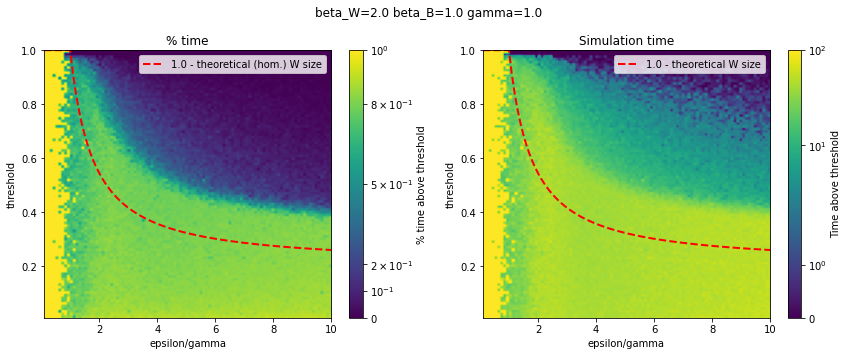

In [8]:
plot_2D_botnet_time(results, bW, bB, gamma)

In [9]:
import pathlib
import pickle

bB = 1.0
bW = 2.0
gamma = 2.0

results = np.empty((0, 4))
for file_path in pathlib.Path('results').glob(f'botnet_threshold_ER_N10000_*_bB{bB}_bW{bW}*_g{gamma}*'):

    th = float(file_path.stem.split('k10_th')[1].split('_')[0])
    eps = float(file_path.stem.split('_e')[1].split('_')[0])

    with open(file_path, 'rb') as file:
        data_list = pickle.load(file)

    time = [time for protected, time, total_time in data_list if protected > 0.01]
    time = np.mean(time) if len(time) else 1

    total_time = [total_time for protected, time, total_time in data_list if protected > 0.01]
    total_time = np.mean(total_time) if len(total_time) else 100
    
    results = np.vstack((results,
                         np.array([eps*gamma, th, time, total_time])))

results = results[results[:, 0].argsort()]
results = results[results[:, 1].argsort(kind='mergesort')]

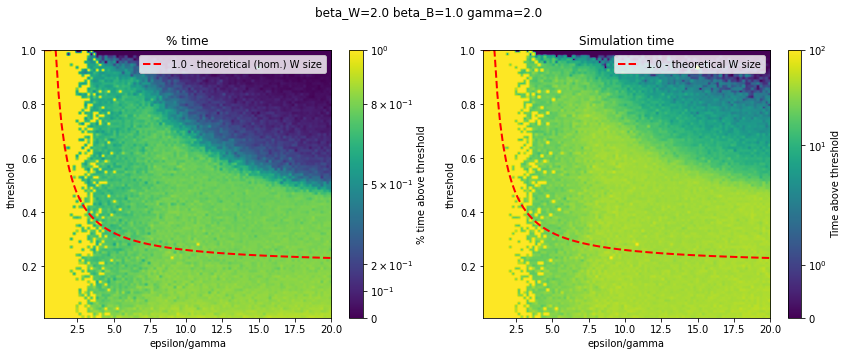

In [10]:
plot_2D_botnet_time(results, bW, bB, gamma)

In [11]:
import pathlib
import pickle

bB = 1.0
bW = 2.0
gamma = 0.5

results = np.empty((0, 4))
for file_path in pathlib.Path('results').glob(f'botnet_threshold_ER_N10000_*_bB{bB}_bW{bW}*_g{gamma}*'):

    th = float(file_path.stem.split('k10_th')[1].split('_')[0])
    eps = float(file_path.stem.split('_e')[1].split('_')[0])

    with open(file_path, 'rb') as file:
        data_list = pickle.load(file)

    time = [time for protected, time, total_time in data_list if protected > 0.01]
    time = np.mean(time) if len(time) else 1

    total_time = [total_time for protected, time, total_time in data_list if protected > 0.01]
    total_time = np.mean(total_time) if len(total_time) else 100
    
    results = np.vstack((results,
                         np.array([eps*gamma, th, time, total_time])))

results = results[results[:, 0].argsort()]
results = results[results[:, 1].argsort(kind='mergesort')]

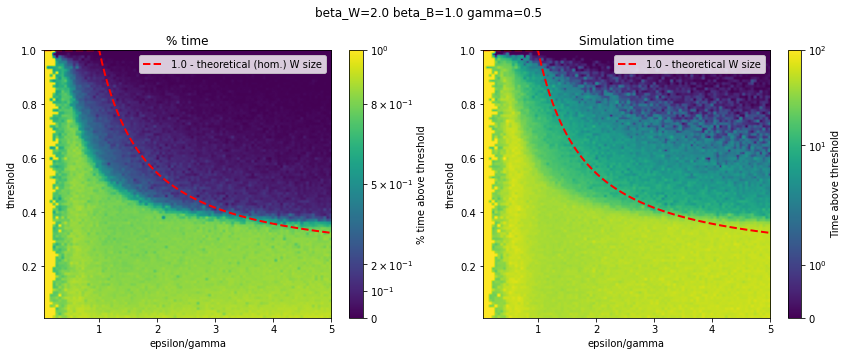

In [12]:
plot_2D_botnet_time(results, bW, bB, gamma)

# Cells to extract data for the paper

In [7]:
results = np.empty((0, 3))
for file_path in pathlib.Path('results').glob('botnet_ER_N10000_*'):

    bB = float(file_path.stem.split('_bB')[1].split('_')[0])
    bW = float(file_path.stem.split('_bW')[1].split('_')[0])

    with open(file_path, 'rb') as file:
        data_list = pickle.load(file)

    botnet = [botnet for botnet, protected in data_list if protected > 0.01]
    botnet = np.mean(botnet) if len(botnet) else 1

    results = np.vstack((results,
                         np.array([bB, bW, botnet])))

results = results[results[:, 1].argsort()]
results = results[results[:, 0].argsort(kind='mergesort')]

data = pd.DataFrame({'beta_b': results[:, 0], 'beta_w': results[:, 1], 'botnet': results[:, 2]})
data.to_csv('plots/data/ER_botnet_size.csv', index=False)